In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
#from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
pd.options.display.max_columns = None
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
state = pd.read_csv("clean1_state.all.csv") # null ve outlier degerlerden temizlenmiş veri yüklendi.

In [3]:
state.head()

,Unnamed: 0,Unnamed: 0.1,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,0,1275,1986_ALABAMA,ALABAMA,1986,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,5387.852941,53672.0,56939.0,57261.0,45396.0,472847.0,208148.0,733735.0,213.0,253.0,207.0,260.0
1,1,1,1527,1986_OKLAHOMA,OKLAHOMA,1986,312817.0,2396705.0,211627.0,1470516.0,714562.0,2515272.0,1283577.0,779828.0,113582.0,194081.0,2495.000000,52321.0,43781.0,42731.0,38606.0,385735.0,177929.0,593183.0,213.0,263.0,220.0,260.0
2,2,2,1520,1986_OHIO,OHIO,1986,1600650.0,9285961.0,472604.0,3631703.0,5181654.0,9483822.0,5172782.0,2961942.0,451400.0,742377.0,5387.852941,122763.0,119315.0,119563.0,100210.0,1015901.0,474588.0,1629157.0,213.0,264.0,217.0,260.0
3,3,3,1513,1986_NORTH_DAKOTA,NORTH_DAKOTA,1986,118793.0,603902.0,51476.0,242693.0,265312.0,614807.0,320561.0,169697.0,44647.0,34904.0,609.000000,10126.0,9243.0,8739.0,8204.0,71244.0,38242.0,118703.0,213.0,281.0,225.0,260.0
4,4,4,1324,1986_DELAWARE,DELAWARE,1986,104355.0,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,26548.0,30595.0,304.000000,7696.0,6620.0,6880.0,6621.0,70161.0,33188.0,94410.0,213.0,261.0,213.0,260.0


### 1.Veri kümesindeki notların ağırlıklı ortalamasını içeren bir değişken oluşturun. Dördüncü sınıftaki öğrencilerin sayısı ile sekizinci sınıftaki öğrencilerin sayısı farklı. Bu yüzden ağırlıklı ortalamaya ihtiyacınız olacak!

In [4]:
a = state["GRADES_4_G"]*(state["AVG_MATH_4_SCORE"]+state["AVG_READING_4_SCORE"])
b = state["GRADES_8_G"]*(state["AVG_MATH_8_SCORE"]+state["AVG_READING_8_SCORE"])
c = 2*(state["GRADES_4_G"]+state["GRADES_8_G"])

state["grade_avg"] = (a+b)/c
state["grade_avg"].head()

0    233.315556
1    238.726916
2    238.524397
3    244.028278
4    237.207407
Name: grade_avg, dtype: float64

In [5]:
state.head()

,Unnamed: 0,Unnamed: 0.1,index,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,grade_avg
0,0,0,1275,1986_ALABAMA,ALABAMA,1986,727716.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,237222.0,174053.0,5387.852941,53672.0,56939.0,57261.0,45396.0,472847.0,208148.0,733735.0,213.0,253.0,207.0,260.0,233.315556
1,1,1,1527,1986_OKLAHOMA,OKLAHOMA,1986,312817.0,2396705.0,211627.0,1470516.0,714562.0,2515272.0,1283577.0,779828.0,113582.0,194081.0,2495.000000,52321.0,43781.0,42731.0,38606.0,385735.0,177929.0,593183.0,213.0,263.0,220.0,260.0,238.726916
2,2,2,1520,1986_OHIO,OHIO,1986,1600650.0,9285961.0,472604.0,3631703.0,5181654.0,9483822.0,5172782.0,2961942.0,451400.0,742377.0,5387.852941,122763.0,119315.0,119563.0,100210.0,1015901.0,474588.0,1629157.0,213.0,264.0,217.0,260.0,238.524397
3,3,3,1513,1986_NORTH_DAKOTA,NORTH_DAKOTA,1986,118793.0,603902.0,51476.0,242693.0,265312.0,614807.0,320561.0,169697.0,44647.0,34904.0,609.000000,10126.0,9243.0,8739.0,8204.0,71244.0,38242.0,118703.0,213.0,281.0,225.0,260.0,244.028278
4,4,4,1324,1986_DELAWARE,DELAWARE,1986,104355.0,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,194915.0,26548.0,30595.0,304.000000,7696.0,6620.0,6880.0,6621.0,70161.0,33188.0,94410.0,213.0,261.0,213.0,260.0,237.207407


### 2.Yeni oluşturduğunuz değişken ile harcama çeşitlerinin korelasyonu nedir? Hangi harcama kaleminin korelasyonu diğerlerine göre fazladır?

In [6]:
expenditures = ["INSTRUCTION_EXPENDITURE",
                "SUPPORT_SERVICES_EXPENDITURE","OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE"]

comparison = pd.DataFrame(columns=["variable","corr"])

for var in expenditures:
    
    a = state["grade_avg"].corr(state[var])
    comparison = comparison.append({"variable":var + " & grade_avg",
                          "corr":a},ignore_index=True)
    
display(comparison)

,variable,corr
0,INSTRUCTION_EXPENDITURE & grade_avg,0.313071
1,SUPPORT_SERVICES_EXPENDITURE & grade_avg,0.303935
2,OTHER_EXPENDITURE & grade_avg,0.230983
3,CAPITAL_OUTLAY_EXPENDITURE & grade_avg,0.262803


In [7]:
# grade_avg değişkeni ile en yüksek korelasyona sahip olan INSTRUCTION_EXPENDITURE değişkenidir.

In [8]:
state_comp = state[["INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE",
       "OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE","grade_avg"]]

state_comp.head()

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,grade_avg
0,1481703.0,735036.0,237222.0,174053.0,233.315556
1,1283577.0,779828.0,113582.0,194081.0,238.726916
2,5172782.0,2961942.0,451400.0,742377.0,238.524397
3,320561.0,169697.0,44647.0,34904.0,244.028278
4,372722.0,194915.0,26548.0,30595.0,237.207407


In [9]:
state_comp.corr()

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,grade_avg
INSTRUCTION_EXPENDITURE,1.000000,0.991807,0.938358,0.918117,0.313071
SUPPORT_SERVICES_EXPENDITURE,0.991807,1.000000,0.938198,0.921004,0.303935
OTHER_EXPENDITURE,0.938358,0.938198,1.000000,0.907869,0.230983
CAPITAL_OUTLAY_EXPENDITURE,0.918117,0.921004,0.907869,1.000000,0.262803
grade_avg,0.313071,0.303935,0.230983,0.262803,1.000000


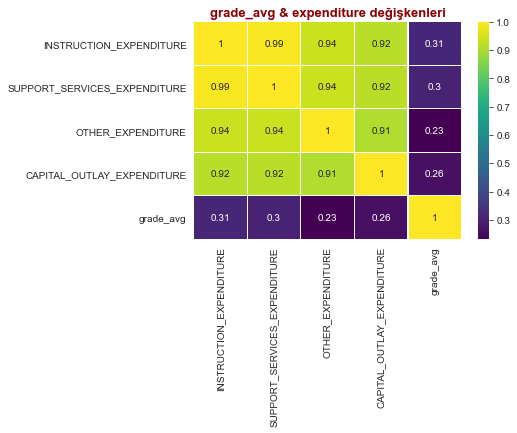

In [10]:
sns.heatmap(state_comp.corr(),annot=True,linewidth = 0.2, cmap="viridis") 
plt.title("grade_avg & expenditure değişkenleri",fontdict = baslik_font)
plt.show()

### 3.Şimdi dört harcama kalemi için Temel Bileşenler Analizi (PCA) uygulayın! Toplam varyansın ne kadarı ilk bileşen tarafından açıklanabilmektedir?

In [11]:
state_pca = state_comp[["INSTRUCTION_EXPENDITURE","SUPPORT_SERVICES_EXPENDITURE",
       "OTHER_EXPENDITURE","CAPITAL_OUTLAY_EXPENDITURE"]]

In [12]:
state_pca = state_pca.dropna()
X = StandardScaler().fit_transform(state_pca)

In [13]:
X

array([[-0.70956531, -0.78314406, -0.30576635, -0.88098195],
       [-0.78615046, -0.75318095, -0.82499614, -0.83824013],
       [ 0.71721286,  0.70651978,  0.59368042,  0.3318801 ],
       ...,
       [ 1.75636677,  1.74368197,  1.70239814,  1.01577694],
       [-0.35164763, -0.23713078, -0.0956933 , -0.53736146],
       [-0.92611282, -0.8830407 , -1.07701829, -0.28290167]])

In [14]:
pca = PCA(n_components=4)  
X_PCA= pca.fit_transform(X)                                    ## toplam varyansın %95 i ilk bileşen tarafından 
                                                                        # acıklanabilmektedir.
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.95204977, 0.02623107, 0.01967965, 0.00203952])

In [15]:
Xt = X.T
Xt

array([[-0.70956531, -0.78615046,  0.71721286, ...,  1.75636677,
        -0.35164763, -0.92611282],
       [-0.78314406, -0.75318095,  0.70651978, ...,  1.74368197,
        -0.23713078, -0.8830407 ],
       [-0.30576635, -0.82499614,  0.59368042, ...,  1.70239814,
        -0.0956933 , -1.07701829],
       [-0.88098195, -0.83824013,  0.3318801 , ...,  1.01577694,
        -0.53736146, -0.28290167]])

In [16]:
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

Kovaryans matrisi :
 [[1.00058343 0.9923859  0.93890526 0.91865306]
 [0.9923859  1.00058343 0.9387451  0.92154119]
 [0.93890526 0.9387451  1.00058343 0.90839893]
 [0.91865306 0.92154119 0.90839893 1.00058343]]


In [25]:
for i in range(len(eig_val_cov)):
    
    eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)
    
    print("{}. öz değer: {}".format(i+1,eig_val_cov[i]),"\n")
    print("{}. özvektör : {}".format(i+1,eig_vec_cov.T[i]),"\n")

1. öz değer: 3.810420882494674 

1. özvektör : [0.50544123 0.50579384 0.49685867 0.49176541] 

2. öz değer: 0.008162824164394839 

2. özvektör : [ 0.70265777 -0.71129872 -0.00712896  0.01659407] 

3. öz değer: 0.07876451155171918 

3. özvektör : [-0.35090402 -0.3583395   0.85465107 -0.1342785 ] 

4. öz değer: 0.1049855040762608 

4. özvektör : [-0.35730602 -0.33139028 -0.15050644  0.86015156] 



In [19]:
#PCA değerleri dataya eklenmiştir
for i in range (0,4):
    state_comp['PCA_%s' %i] = X_PCA[:, i]
    
state_comp

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,grade_avg,PCA_0,PCA_1,PCA_2,PCA_3
0,1481703.0,735036.0,237222.0,174053.0,233.315556,-1.339912,-0.198700,0.386594,0.046029
1,1283577.0,779828.0,113582.0,194081.0,238.726916,-1.600431,-0.066353,-0.046768,-0.024687
2,5172782.0,2961942.0,451400.0,742377.0,238.524397,1.178045,-0.294284,-0.042022,0.002683
3,320561.0,169697.0,44647.0,34904.0,244.028278,-2.305908,-0.046715,0.028307,0.000484
4,372722.0,194915.0,26548.0,30595.0,237.207407,-2.329472,-0.055979,-0.048538,0.003042
...,...,...,...,...,...,...,...,...,...
1710,7779504.0,4338868.0,397653.0,1055665.0,249.973611,2.369857,-0.350491,-1.008342,0.068238
1711,7861076.0,4512401.0,504388.0,945525.0,255.410675,2.551629,-0.669868,-0.646355,0.000729
1712,7861076.0,4512401.0,715410.0,1062838.0,249.906259,3.115059,-0.587899,0.077413,-0.001434
1713,2407637.0,1551274.0,287245.0,335067.0,246.732512,-0.609478,-0.243581,0.198740,-0.086652


### 4.Oluşturduğunuz genel not ortalaması ve ilk temel bileşen arasındaki korelasyon nedir?

In [20]:
state_comp["grade_avg"].corr(state_comp["PCA_0"])

0.28489957830249957

### 5.Modeliniz için en uygun değişkenleri seçmeniz gerektiğinde, harcama kalemlerinin yerine ilk temel değişkenleri tercih eder miydiniz? Neden?

In [21]:
### varyansın büyük kısmını açıklayan değişkeni secme imkanı verdiği için ve değişken sayısını 
## azaltıp boyutu küçülttüğü için ilk temel değişkenleri tercih ederim.